# Malnutrition across the globe

## Context

Malnutrition continues to be the reason for making children much more vulnerable to diseases and death.
There are 4 broad types of malnutrition: wasting, stunting, underweight and overweight.

## Content

Severe Wasting - % of children aged 0–59 months who are below minus three standard deviations from median weight-for-height

Wasting – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median weight-for-height

Overweight – Moderate and severe: % aged 0-59 months who are above two standard deviations from median weight-for-height

Stunting – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median height-for-age

Underweight – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median weight-for-age

U5 population - Population under 5 years old.

## Inspiration

Was there a decline or rise in the number of malnutrition cases country-wise?
Which countries bear the greatest share of all forms of malnutrition?
% of stunted, overweight and wasted children under 5, by country income classification

## Exploring the Data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
%matplotlib inline

### Loading the data

In [142]:
### Average malnutrition

df_country = pd.read_csv('country-wise-average.csv',index_col='Country')
df_country.drop('Income Classification',axis=1,inplace=True)
df_country.dropna(inplace=True)


### Malnutrition per year

df_malnutrition = pd.read_csv('malnutrition-estimates.csv',index_col='Country')
df_malnutrition.drop('Unnamed: 0',axis=1,inplace=True)


### ISO-Continent data

country_cont = pd.read_csv('https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv',index_col='Three_Letter_Country_Code')


### Human development index (HDI)

hdi_data = pd.read_csv('human-development-index.csv')

### Creating a continent column

In [143]:
iso_codes = df_malnutrition[['ISO code']].drop_duplicates()
iso_codes.head()

,ISO code
Country,
AFGHANISTAN,AFG
ALBANIA,ALB
ALGERIA,DZA
ANGOLA,AGO
ARGENTINA,ARG


In [144]:
for country in iso_codes.index:
    df_country.loc[df_country.index==country,'ISO code']=iso_codes.loc[country,'ISO code']

for iso in df_country['ISO code'].unique():
    if country_cont.loc[iso,['Continent_Name']].size==1:
        df_country.loc[df_country['ISO code']==iso,'Continent']=country_cont.loc[iso,'Continent_Name']
    else:
        df_country.loc[df_country['ISO code']==iso,'Continent']=country_cont.loc[iso,'Continent_Name'][0]

df_country.head()

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),ISO code,Continent
Country,,,,,,,,
AFGHANISTAN,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500,AFG,Asia
ALBANIA,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800,ALB,Europe
ALGERIA,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143,DZA,Africa
ANGOLA,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000,AGO,Africa
ARGENTINA,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750,ARG,South America


### Adding HD average

In [145]:
av_hdi = hdi_data.groupby('Code')[' ((0-1; higher values are better))'].mean()

In [146]:
for iso in df_country['ISO code'].unique():
    if iso in av_hdi.index:
        df_country.loc[df_country['ISO code']==iso,'HDI average']=av_hdi[iso]
    else:
        df_country.loc[df_country['ISO code']==iso,'HDI average']=np.nan

df_country.dropna(inplace=True)

In [147]:
df_country.head()

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),ISO code,Continent,HDI average
Country,,,,,,,,,
AFGHANISTAN,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500,AFG,Asia,0.426556
ALBANIA,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800,ALB,Europe,0.691133
ALGERIA,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143,DZA,Africa,0.672000
ANGOLA,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000,AGO,Africa,0.491526
ARGENTINA,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750,ARG,South America,0.769200


### Data information

In [149]:
report = ProfileReport(df_country)
report

## Data Visualization

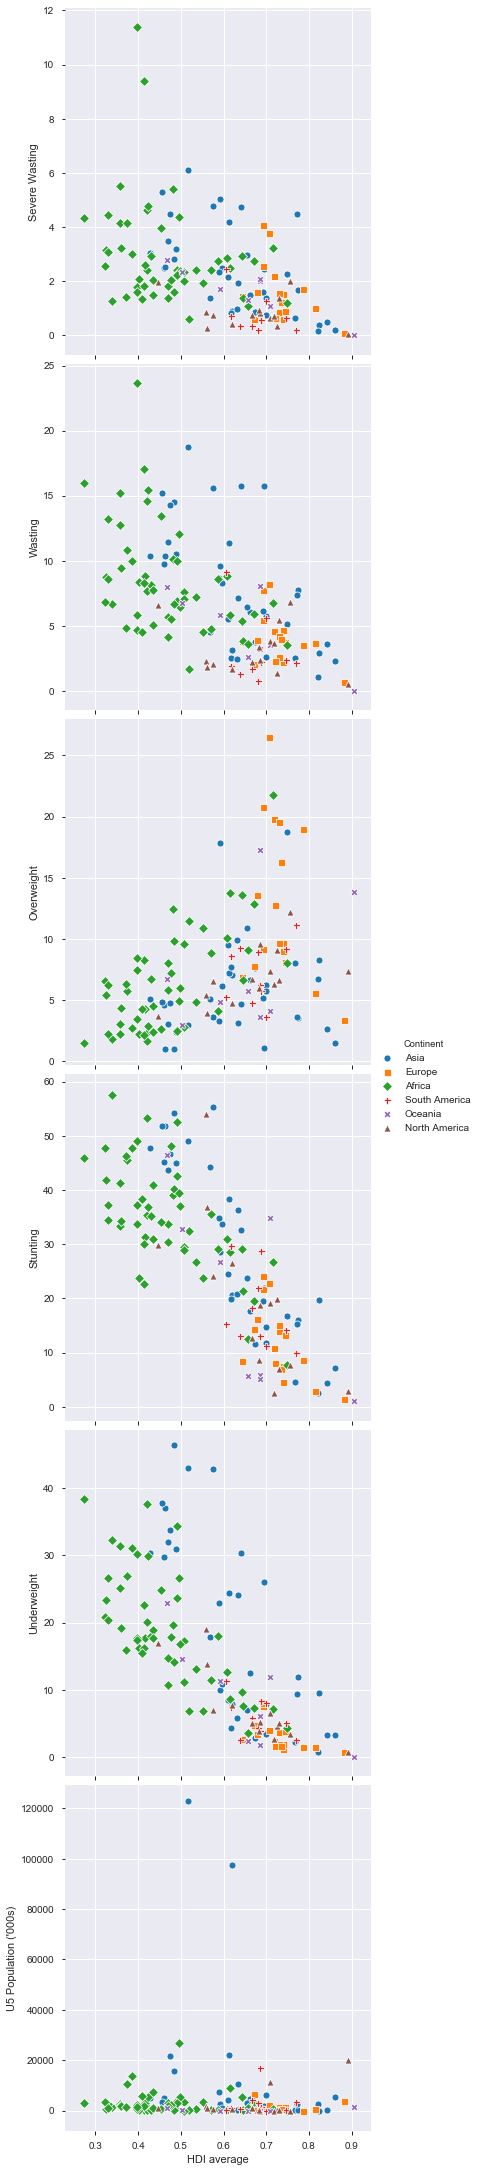

In [192]:
sns.pairplot(data=df_country,x_vars='HDI average',y_vars=['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight',
       "U5 Population ('000s)"],hue='Continent',size=5,markers=["o", "s", "D",'P','X','^'])
plt.show()

In [363]:
mean_cont = df_country.groupby('Continent').mean()
mean_cont

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),HDI average
Continent,,,,,,,
Africa,2.955339,8.407811,6.262043,35.152930,18.752376,2966.911066,0.467296
Asia,2.417341,8.030207,5.865969,28.682877,17.856951,9891.180316,0.631067
Europe,1.554706,3.960000,12.792157,11.826667,3.157619,1113.326781,0.730561
North America,0.851147,3.148410,6.824318,19.342364,7.323716,2758.052016,0.665951
Oceania,1.666667,4.741667,7.396875,19.808333,8.910417,319.274312,0.650269
South America,0.746000,2.944548,7.273333,17.542571,5.966177,3142.893020,0.679459


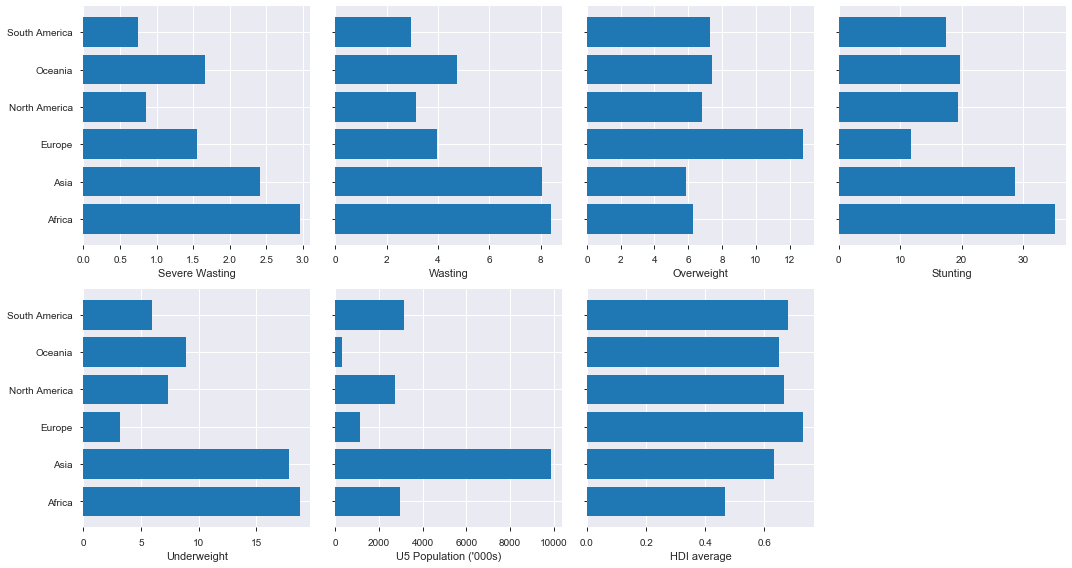

In [362]:
fig,ax = plt.subplots(2,4,sharey=True,figsize=(15,8))

for i, var in enumerate(mean_cont.columns):
    if i<=3:
        ax[0,i].barh(mean_cont.index,mean_cont[var])
        ax[0,i].set_xlabel(var)
    else:
        ax[1,i-4].barh(mean_cont.index,mean_cont[var])
        ax[1,i-4].set_xlabel(var)
fig.delaxes(ax[1,3])
fig.tight_layout()
plt.show()